# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies
import requests
import json
import numpy as np
import random
import time
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [87]:
#prototype proof of concept 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "New York City"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json


{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 47.21,
  'feels_like': 45.19,
  'temp_min': 45,
  'temp_max': 48.99,
  'pressure': 1006,
  'humidity': 49},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 0},
 'clouds': {'all': 1},
 'dt': 1619841803,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1619862853,
  'sunset': 1619913106},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [88]:
lon = weather_json["coord"]["lon"]
lat = weather_json["coord"]["lat"]
temp = weather_json["main"]["temp"]
humidity = weather_json["main"]["humidity"]
cloudiness = weather_json["clouds"]["all"]
wind_speed = weather_json["wind"]["speed"]
name = weather_json["name"]
print(f"The temperature is currently {temp}F. in {name}.")
print(f"The barometer is currently at {humidity}% in {name}.")
print(f"There is {cloudiness}% cloud cover currently in {name}.")
print(f"The wind is currently blowing at {wind_speed} mph in {name}.")
print(f"The latitude of {name} is {lat}.")
print(f"The longitude of {name} is {lon}.")

The temperature is currently 47.21F. in New York.
The barometer is currently at 49% in New York.
There is 1% cloud cover currently in New York.
The wind is currently blowing at 4.61 mph in New York.
The latitude of New York is 40.7143.
The longitude of New York is -74.006.


## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [90]:
cities

['torbay',
 'bengkulu',
 'sentyabrskiy',
 'kieta',
 'gandiangan',
 'rikitea',
 'tateyama',
 'qaanaaq',
 'nuevo progreso',
 'ponta do sol',
 'mataura',
 'rio grande',
 'ushuaia',
 'lebu',
 'khatanga',
 'meyungs',
 'araouane',
 'amderma',
 'provideniya',
 'port alfred',
 'cape town',
 'saint-philippe',
 'barrow',
 'vaini',
 'barentsburg',
 'marcona',
 'guerrero negro',
 'busselton',
 'meulaboh',
 'paamiut',
 'bambous virieux',
 'albany',
 'sinnamary',
 'nikolskoye',
 'punta arenas',
 'airai',
 'turia',
 'thompson',
 'arraial do cabo',
 'ahome',
 'vardo',
 'jamestown',
 'yirol',
 'butaritari',
 'hofn',
 'hilo',
 'sisimiut',
 'shipitsyno',
 'lagoa',
 'toliary',
 'tautira',
 'ostrovnoy',
 'tuktoyaktuk',
 'severo-kurilsk',
 'hobart',
 'mutsamudu',
 'manhattan',
 'longyearbyen',
 'yellowknife',
 'saint anthony',
 'mackay',
 'kargasok',
 'hithadhoo',
 'bluff',
 'uba',
 'aripuana',
 'la ronge',
 'chuy',
 'hermanus',
 'jumla',
 'dikson',
 'belushya guba',
 'lorengau',
 'cabo san lucas',
 'taolan

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [91]:
#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
#     query_url = url + "appid=" + weather_api_key + "&q=" + city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")


Processing record 1|torbay
Processing record 2|bengkulu
City not found. skipping.
Processing record 3|kieta
City not found. skipping.
Processing record 4|rikitea
Processing record 5|tateyama
Processing record 6|qaanaaq
Processing record 7|nuevo progreso
Processing record 8|ponta do sol
Processing record 9|mataura
Processing record 10|rio grande
Processing record 11|ushuaia
Processing record 12|lebu
Processing record 13|khatanga
City not found. skipping.
Processing record 14|araouane
City not found. skipping.
Processing record 15|provideniya
Processing record 16|port alfred
Processing record 17|cape town
Processing record 18|saint-philippe
Processing record 19|barrow
Processing record 20|vaini
City not found. skipping.
City not found. skipping.
Processing record 21|guerrero negro
Processing record 22|busselton
Processing record 23|meulaboh
Processing record 24|paamiut
Processing record 25|bambous virieux
Processing record 26|albany
Processing record 27|sinnamary
Processing record 28|nik

Processing record 247|verkhoyansk
Processing record 248|malakal
Processing record 249|san rafael
Processing record 250|port-cartier
Processing record 251|popondetta
Processing record 252|wageningen
Processing record 253|port moresby
Processing record 254|kot samaba
Processing record 255|poum
Processing record 256|nemuro
Processing record 257|ilulissat
Processing record 258|keflavik
Processing record 259|port hedland
City not found. skipping.
Processing record 260|tuatapere
Processing record 261|katangli
Processing record 262|zaysan
Processing record 263|fort nelson
Processing record 264|lakes entrance
Processing record 265|coutances
Processing record 266|belmonte
Processing record 267|filingue
Processing record 268|mareeba
Processing record 269|honiara
Processing record 270|lavrentiya
Processing record 271|rawson
Processing record 272|faya
Processing record 273|williams lake
Processing record 274|mayskiy
City not found. skipping.
Processing record 275|teahupoo
Processing record 276|wan

Processing record 491|tomatlan
Processing record 492|toul
Processing record 493|pajapan
Processing record 494|saint augustine
Processing record 495|aanekoski
Processing record 496|hambantota
Processing record 497|doaba
Processing record 498|somerset
Processing record 499|sabha
Processing record 500|weligama
Processing record 501|belle fourche
Processing record 502|barcelos
Processing record 503|guiyang
Processing record 504|shawville
Processing record 505|likasi
Processing record 506|trairi
City not found. skipping.
Processing record 507|petrolia
Processing record 508|pavlovskiy
Processing record 509|inhambane
Processing record 510|bilibino
City not found. skipping.
Processing record 511|clyde river
City not found. skipping.
Processing record 512|san pedro
Processing record 513|altos del rosario
Processing record 514|dillon
Processing record 515|bilma
Processing record 516|shahgarh
Processing record 517|warri
Processing record 518|nova era
Processing record 519|tupik
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
pprint(response)

{'cod': '404', 'message': 'city not found'}


In [93]:
city_data_df = pd.DataFrame(
                {'City':city_name,
                 'Latitude': lat,
                 'Longitude': lng,
                 'Temperature (max)': max_temp,
                 'Humidity': humidity,
                 'Cloudiness': cloudiness,
                 'Wind Speed': wind_speed,
                 'Country': country,
                 'Date': date
                    
                
                }
)
  

In [95]:
#export to .csv
city_data_df.to_csv("../output_data_file.csv", index = False)

In [96]:
city_data_df.head()

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,37.99,100,90,25.32,CA,1619841672
1,Bengkulu,-3.8004,102.2655,85.30,65,80,4.85,ID,1619841604
2,Kieta,-6.2167,155.6333,82.98,77,35,2.89,PG,1619841758
3,Rikitea,-23.1203,-134.9692,78.96,79,79,20.36,PF,1619841627
4,Tateyama,34.9833,139.8667,68.00,52,75,17.27,JP,1619841727


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [97]:
city_data_df.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,21.419800,13.412313,61.744419,68.512998,55.067591,7.836880,1.619842e+09
std,32.953399,91.350280,18.644196,22.906973,39.057969,5.935636,1.399766e+02
min,-54.800000,-179.166700,12.200000,6.000000,0.000000,0.180000,1.619841e+09
25%,-5.016700,-66.895800,47.010000,54.000000,17.000000,3.440000,1.619842e+09
50%,25.916700,17.944200,65.550000,73.000000,65.000000,6.460000,1.619842e+09
75%,49.577600,96.370000,77.000000,87.000000,94.000000,10.360000,1.619842e+09
max,78.218600,179.316700,100.510000,100.000000,100.000000,59.840000,1.619842e+09


In [98]:
#  Get the indices of cities that have humidity over 100%.
# skip, no cities over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# skip, no cities over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

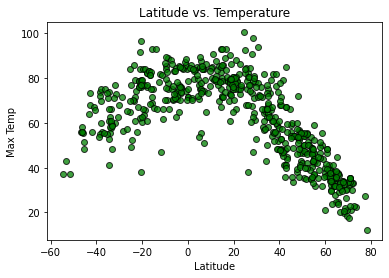

In [146]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature (max)'], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data/latitude_vs_temp.png", bbox_inches="tight")

plt.show()

## Latitude vs. Humidity Plot

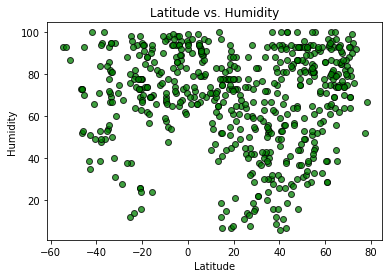

In [147]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")

plt.show()

## Latitude vs. Cloudiness Plot

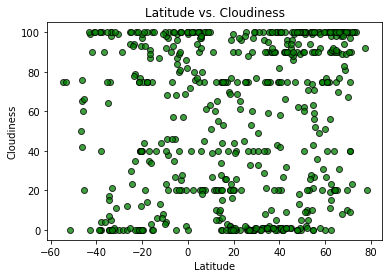

In [148]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")

plt.show()

## Latitude vs. Wind Speed Plot

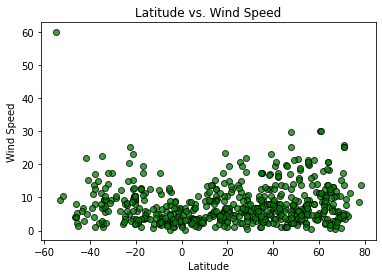

In [149]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/latitude_vs_windspeed.png", bbox_inches="tight")

plt.show()

## Linear Regression

In [103]:
n_hemi = city_data_df.loc[city_data_df['Latitude'] > 0]
n_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,37.99,100,90,25.32,CA,1619841672
4,Tateyama,34.9833,139.8667,68.00,52,75,17.27,JP,1619841727
5,Qaanaaq,77.4840,-69.3632,27.52,52,92,8.52,GL,1619841629
6,Nuevo Progreso,23.1667,-97.9500,75.99,65,96,3.00,MX,1619841867
7,Ponta do Sol,32.6667,-17.1000,57.99,58,100,3.00,PT,1619841621
...,...,...,...,...,...,...,...,...,...
568,Newry,54.1784,-6.3374,36.00,83,10,1.01,GB,1619841998
569,Sitka,57.0531,-135.3300,44.60,93,90,4.61,US,1619841676
573,Sur,22.5667,59.5289,86.25,49,61,3.83,OM,1619841705
575,Plaridel,14.8872,120.8572,93.20,52,20,5.75,PH,1619841999


In [104]:
s_hemi = city_data_df.loc[city_data_df['Latitude'] < 0]
s_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
1,Bengkulu,-3.8004,102.2655,85.30,65,80,4.85,ID,1619841604
2,Kieta,-6.2167,155.6333,82.98,77,35,2.89,PG,1619841758
3,Rikitea,-23.1203,-134.9692,78.96,79,79,20.36,PF,1619841627
8,Mataura,-46.1927,168.8643,55.99,73,65,4.00,NZ,1619841611
9,Rio Grande,-32.0350,-52.0986,60.01,95,0,14.05,BR,1619841767
...,...,...,...,...,...,...,...,...,...
563,Mahébourg,-20.4081,57.7000,77.00,78,40,10.36,MU,1619841682
570,São João da Barra,-21.6403,-41.0511,66.96,78,100,8.55,BR,1619841998
571,Labuhan,-6.8844,112.2051,86.27,65,46,7.25,ID,1619841694
572,Iquique,-20.2208,-70.1431,62.60,67,0,1.86,CL,1619841746


In [105]:
n_hemi.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,4.070000e+02
mean,39.060108,9.165495,57.978722,66.420147,55.835381,7.952948,1.619842e+09
std,20.124240,87.963776,19.655877,23.861523,39.208109,5.716699,1.351944e+02
min,0.038900,-179.166700,12.200000,6.000000,0.000000,0.290000,1.619841e+09
25%,21.187850,-73.001950,41.000000,50.500000,19.500000,3.645000,1.619842e+09
50%,40.427200,15.387800,55.990000,72.000000,69.000000,6.490000,1.619842e+09
75%,55.108850,81.299650,76.345000,86.000000,96.000000,10.390000,1.619842e+09
max,78.218600,179.316700,100.510000,100.000000,100.000000,29.930000,1.619842e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8760029426326319


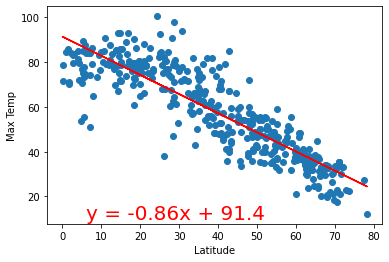

In [145]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6081699724291902


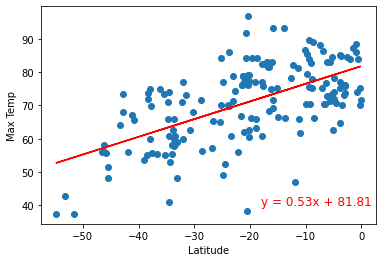

In [119]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10092791672100873


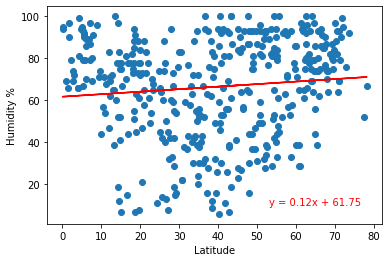

In [124]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21898784769415572


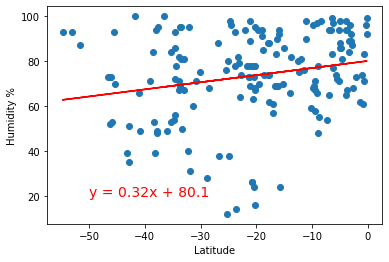

In [127]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20630350902258776


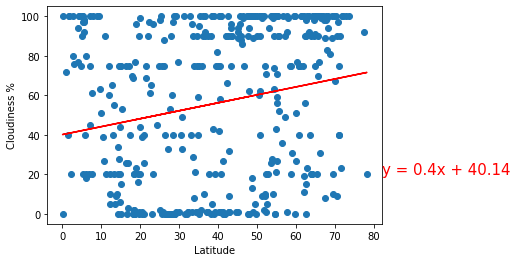

In [136]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12731180572768852


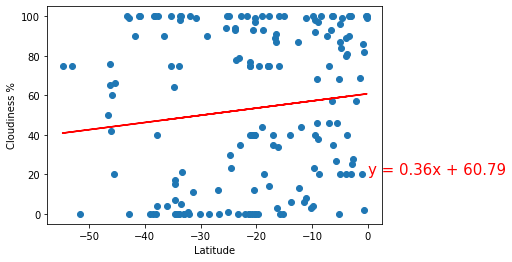

In [139]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20043593515945188


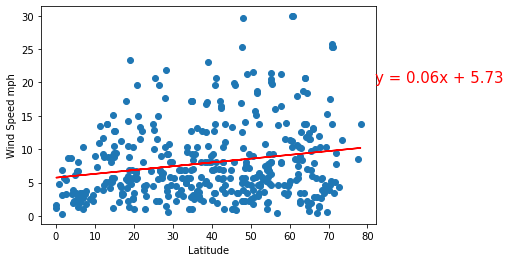

In [140]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.301312322973802


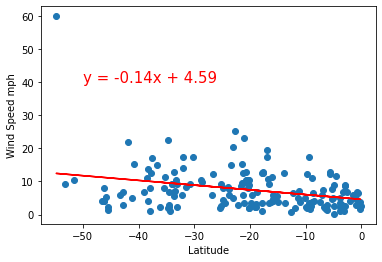

In [143]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()